In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Define the GRU model
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()

        self.hidden_size = hidden_size

        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.gru(x, hidden)
        output = self.fc(output)
        return output, hidden

(1, 256)
(1, 100)
(256, 100)


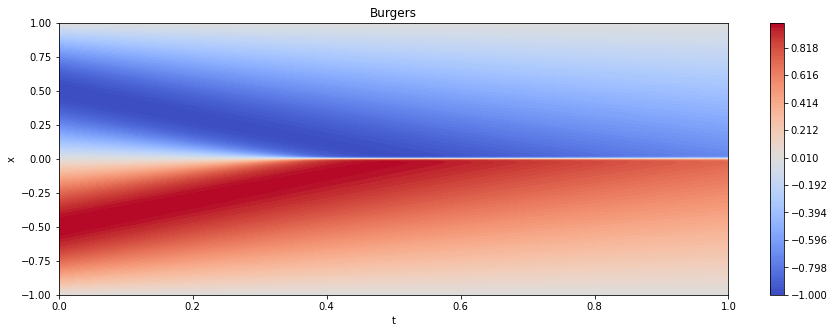

In [3]:
# Load the .mat file
mat_data = scipy.io.loadmat('burg.mat')

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['t']
u = mat_data['u1']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u), np.max(u), 100)

# Plot the contour
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Burgers')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

### Exact solution

x size (256, 1)
t size (100, 1)
u size (256, 100)


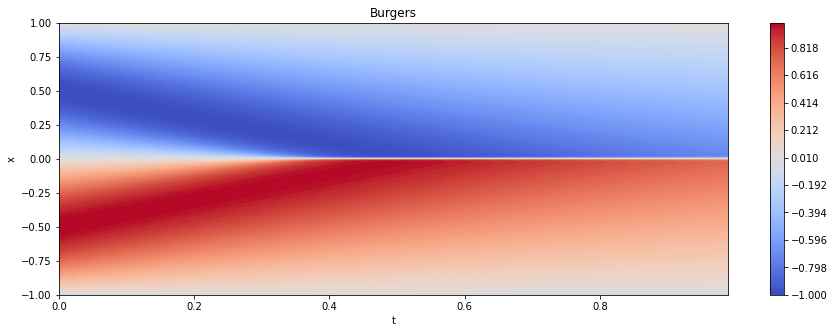

In [4]:
# importing data

import torch
import torch.nn as nn
import numpy as np
import time
import scipy.io

# Load the .mat file
mat_data = scipy.io.loadmat('burgers_shock.mat')

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['t']
u_1 = mat_data['usol']

#Use the loaded variables as needed
print("x size", x.shape)
print("t size", t.shape)
print("u size", u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u_1), np.max(u_1), 100)

# Plot the contour
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u_1.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Burgers')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [5]:
# Toy problem data
input_size = 256
hidden_size = 32
output_size = 256
sequence_length = 79
batch_size = 1
num_epochs = 20000


# Set random seed for reproducibility
torch.manual_seed(42)



input_data = u[:,0:79]
target_data = u[:,1:80]

test_data = u[:,79]
#test_target = u[:,80:100]


# Convert data to tensors
input_tensor = torch.tensor(input_data.T).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data.T).view(batch_size, sequence_length, output_size).float()

# Convert test data to tensors
test_tensor = torch.tensor(test_data.T).view(batch_size, 1, input_size).float()
#test_target_tensor = torch.tensor(test_target.T).view(batch_size, 20, output_size).float()

# Create GRU instance
gru = GRU(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(gru.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state
    hidden = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, hidden = gru(input_tensor, hidden)
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')


Epoch: 10/20000, Loss: 0.0473
Epoch: 20/20000, Loss: 0.0354
Epoch: 30/20000, Loss: 0.0198
Epoch: 40/20000, Loss: 0.0104
Epoch: 50/20000, Loss: 0.0053
Epoch: 60/20000, Loss: 0.0032
Epoch: 70/20000, Loss: 0.0024
Epoch: 80/20000, Loss: 0.0021
Epoch: 90/20000, Loss: 0.0019
Epoch: 100/20000, Loss: 0.0017
Epoch: 110/20000, Loss: 0.0016
Epoch: 120/20000, Loss: 0.0015
Epoch: 130/20000, Loss: 0.0014
Epoch: 140/20000, Loss: 0.0013
Epoch: 150/20000, Loss: 0.0012
Epoch: 160/20000, Loss: 0.0016
Epoch: 170/20000, Loss: 0.0011
Epoch: 180/20000, Loss: 0.0010
Epoch: 190/20000, Loss: 0.0009
Epoch: 200/20000, Loss: 0.0009
Epoch: 210/20000, Loss: 0.0008
Epoch: 220/20000, Loss: 0.0007
Epoch: 230/20000, Loss: 0.0007
Epoch: 240/20000, Loss: 0.0007
Epoch: 250/20000, Loss: 0.0006
Epoch: 260/20000, Loss: 0.0006
Epoch: 270/20000, Loss: 0.0006
Epoch: 280/20000, Loss: 0.0005
Epoch: 290/20000, Loss: 0.0007
Epoch: 300/20000, Loss: 0.0005
Epoch: 310/20000, Loss: 0.0005
Epoch: 320/20000, Loss: 0.0004
Epoch: 330/20000,

Epoch: 2620/20000, Loss: 0.0000
Epoch: 2630/20000, Loss: 0.0000
Epoch: 2640/20000, Loss: 0.0000
Epoch: 2650/20000, Loss: 0.0000
Epoch: 2660/20000, Loss: 0.0001
Epoch: 2670/20000, Loss: 0.0000
Epoch: 2680/20000, Loss: 0.0000
Epoch: 2690/20000, Loss: 0.0000
Epoch: 2700/20000, Loss: 0.0000
Epoch: 2710/20000, Loss: 0.0000
Epoch: 2720/20000, Loss: 0.0000
Epoch: 2730/20000, Loss: 0.0000
Epoch: 2740/20000, Loss: 0.0001
Epoch: 2750/20000, Loss: 0.0000
Epoch: 2760/20000, Loss: 0.0000
Epoch: 2770/20000, Loss: 0.0000
Epoch: 2780/20000, Loss: 0.0000
Epoch: 2790/20000, Loss: 0.0000
Epoch: 2800/20000, Loss: 0.0000
Epoch: 2810/20000, Loss: 0.0000
Epoch: 2820/20000, Loss: 0.0003
Epoch: 2830/20000, Loss: 0.0001
Epoch: 2840/20000, Loss: 0.0000
Epoch: 2850/20000, Loss: 0.0000
Epoch: 2860/20000, Loss: 0.0000
Epoch: 2870/20000, Loss: 0.0000
Epoch: 2880/20000, Loss: 0.0000
Epoch: 2890/20000, Loss: 0.0000
Epoch: 2900/20000, Loss: 0.0000
Epoch: 2910/20000, Loss: 0.0000
Epoch: 2920/20000, Loss: 0.0000
Epoch: 2

Epoch: 5200/20000, Loss: 0.0000
Epoch: 5210/20000, Loss: 0.0001
Epoch: 5220/20000, Loss: 0.0000
Epoch: 5230/20000, Loss: 0.0000
Epoch: 5240/20000, Loss: 0.0000
Epoch: 5250/20000, Loss: 0.0000
Epoch: 5260/20000, Loss: 0.0000
Epoch: 5270/20000, Loss: 0.0000
Epoch: 5280/20000, Loss: 0.0001
Epoch: 5290/20000, Loss: 0.0000
Epoch: 5300/20000, Loss: 0.0000
Epoch: 5310/20000, Loss: 0.0000
Epoch: 5320/20000, Loss: 0.0000
Epoch: 5330/20000, Loss: 0.0000
Epoch: 5340/20000, Loss: 0.0001
Epoch: 5350/20000, Loss: 0.0000
Epoch: 5360/20000, Loss: 0.0000
Epoch: 5370/20000, Loss: 0.0000
Epoch: 5380/20000, Loss: 0.0000
Epoch: 5390/20000, Loss: 0.0000
Epoch: 5400/20000, Loss: 0.0000
Epoch: 5410/20000, Loss: 0.0000
Epoch: 5420/20000, Loss: 0.0000
Epoch: 5430/20000, Loss: 0.0000
Epoch: 5440/20000, Loss: 0.0001
Epoch: 5450/20000, Loss: 0.0000
Epoch: 5460/20000, Loss: 0.0000
Epoch: 5470/20000, Loss: 0.0000
Epoch: 5480/20000, Loss: 0.0000
Epoch: 5490/20000, Loss: 0.0000
Epoch: 5500/20000, Loss: 0.0000
Epoch: 5

Epoch: 7780/20000, Loss: 0.0000
Epoch: 7790/20000, Loss: 0.0000
Epoch: 7800/20000, Loss: 0.0000
Epoch: 7810/20000, Loss: 0.0000
Epoch: 7820/20000, Loss: 0.0000
Epoch: 7830/20000, Loss: 0.0000
Epoch: 7840/20000, Loss: 0.0000
Epoch: 7850/20000, Loss: 0.0000
Epoch: 7860/20000, Loss: 0.0000
Epoch: 7870/20000, Loss: 0.0000
Epoch: 7880/20000, Loss: 0.0000
Epoch: 7890/20000, Loss: 0.0000
Epoch: 7900/20000, Loss: 0.0000
Epoch: 7910/20000, Loss: 0.0000
Epoch: 7920/20000, Loss: 0.0000
Epoch: 7930/20000, Loss: 0.0002
Epoch: 7940/20000, Loss: 0.0001
Epoch: 7950/20000, Loss: 0.0000
Epoch: 7960/20000, Loss: 0.0000
Epoch: 7970/20000, Loss: 0.0000
Epoch: 7980/20000, Loss: 0.0000
Epoch: 7990/20000, Loss: 0.0000
Epoch: 8000/20000, Loss: 0.0000
Epoch: 8010/20000, Loss: 0.0000
Epoch: 8020/20000, Loss: 0.0000
Epoch: 8030/20000, Loss: 0.0000
Epoch: 8040/20000, Loss: 0.0000
Epoch: 8050/20000, Loss: 0.0000
Epoch: 8060/20000, Loss: 0.0001
Epoch: 8070/20000, Loss: 0.0000
Epoch: 8080/20000, Loss: 0.0000
Epoch: 8

Epoch: 10330/20000, Loss: 0.0000
Epoch: 10340/20000, Loss: 0.0000
Epoch: 10350/20000, Loss: 0.0000
Epoch: 10360/20000, Loss: 0.0000
Epoch: 10370/20000, Loss: 0.0000
Epoch: 10380/20000, Loss: 0.0000
Epoch: 10390/20000, Loss: 0.0000
Epoch: 10400/20000, Loss: 0.0001
Epoch: 10410/20000, Loss: 0.0001
Epoch: 10420/20000, Loss: 0.0000
Epoch: 10430/20000, Loss: 0.0000
Epoch: 10440/20000, Loss: 0.0000
Epoch: 10450/20000, Loss: 0.0000
Epoch: 10460/20000, Loss: 0.0000
Epoch: 10470/20000, Loss: 0.0000
Epoch: 10480/20000, Loss: 0.0000
Epoch: 10490/20000, Loss: 0.0000
Epoch: 10500/20000, Loss: 0.0000
Epoch: 10510/20000, Loss: 0.0000
Epoch: 10520/20000, Loss: 0.0000
Epoch: 10530/20000, Loss: 0.0000
Epoch: 10540/20000, Loss: 0.0000
Epoch: 10550/20000, Loss: 0.0001
Epoch: 10560/20000, Loss: 0.0000
Epoch: 10570/20000, Loss: 0.0001
Epoch: 10580/20000, Loss: 0.0000
Epoch: 10590/20000, Loss: 0.0001
Epoch: 10600/20000, Loss: 0.0050
Epoch: 10610/20000, Loss: 0.0046
Epoch: 10620/20000, Loss: 0.0012
Epoch: 106

Epoch: 12820/20000, Loss: 0.0000
Epoch: 12830/20000, Loss: 0.0000
Epoch: 12840/20000, Loss: 0.0000
Epoch: 12850/20000, Loss: 0.0000
Epoch: 12860/20000, Loss: 0.0000
Epoch: 12870/20000, Loss: 0.0000
Epoch: 12880/20000, Loss: 0.0000
Epoch: 12890/20000, Loss: 0.0000
Epoch: 12900/20000, Loss: 0.0000
Epoch: 12910/20000, Loss: 0.0000
Epoch: 12920/20000, Loss: 0.0000
Epoch: 12930/20000, Loss: 0.0000
Epoch: 12940/20000, Loss: 0.0001
Epoch: 12950/20000, Loss: 0.0000
Epoch: 12960/20000, Loss: 0.0000
Epoch: 12970/20000, Loss: 0.0000
Epoch: 12980/20000, Loss: 0.0000
Epoch: 12990/20000, Loss: 0.0000
Epoch: 13000/20000, Loss: 0.0000
Epoch: 13010/20000, Loss: 0.0000
Epoch: 13020/20000, Loss: 0.0001
Epoch: 13030/20000, Loss: 0.0000
Epoch: 13040/20000, Loss: 0.0000
Epoch: 13050/20000, Loss: 0.0000
Epoch: 13060/20000, Loss: 0.0000
Epoch: 13070/20000, Loss: 0.0000
Epoch: 13080/20000, Loss: 0.0000
Epoch: 13090/20000, Loss: 0.0000
Epoch: 13100/20000, Loss: 0.0001
Epoch: 13110/20000, Loss: 0.0000
Epoch: 131

Epoch: 15310/20000, Loss: 0.0000
Epoch: 15320/20000, Loss: 0.0000
Epoch: 15330/20000, Loss: 0.0000
Epoch: 15340/20000, Loss: 0.0000
Epoch: 15350/20000, Loss: 0.0000
Epoch: 15360/20000, Loss: 0.0000
Epoch: 15370/20000, Loss: 0.0000
Epoch: 15380/20000, Loss: 0.0000
Epoch: 15390/20000, Loss: 0.0000
Epoch: 15400/20000, Loss: 0.0001
Epoch: 15410/20000, Loss: 0.0001
Epoch: 15420/20000, Loss: 0.0000
Epoch: 15430/20000, Loss: 0.0000
Epoch: 15440/20000, Loss: 0.0000
Epoch: 15450/20000, Loss: 0.0000
Epoch: 15460/20000, Loss: 0.0000
Epoch: 15470/20000, Loss: 0.0000
Epoch: 15480/20000, Loss: 0.0001
Epoch: 15490/20000, Loss: 0.0000
Epoch: 15500/20000, Loss: 0.0000
Epoch: 15510/20000, Loss: 0.0000
Epoch: 15520/20000, Loss: 0.0000
Epoch: 15530/20000, Loss: 0.0000
Epoch: 15540/20000, Loss: 0.0000
Epoch: 15550/20000, Loss: 0.0000
Epoch: 15560/20000, Loss: 0.0000
Epoch: 15570/20000, Loss: 0.0001
Epoch: 15580/20000, Loss: 0.0000
Epoch: 15590/20000, Loss: 0.0000
Epoch: 15600/20000, Loss: 0.0000
Epoch: 156

Epoch: 17800/20000, Loss: 0.0000
Epoch: 17810/20000, Loss: 0.0001
Epoch: 17820/20000, Loss: 0.0000
Epoch: 17830/20000, Loss: 0.0000
Epoch: 17840/20000, Loss: 0.0000
Epoch: 17850/20000, Loss: 0.0000
Epoch: 17860/20000, Loss: 0.0000
Epoch: 17870/20000, Loss: 0.0000
Epoch: 17880/20000, Loss: 0.0000
Epoch: 17890/20000, Loss: 0.0000
Epoch: 17900/20000, Loss: 0.0000
Epoch: 17910/20000, Loss: 0.0000
Epoch: 17920/20000, Loss: 0.0000
Epoch: 17930/20000, Loss: 0.0000
Epoch: 17940/20000, Loss: 0.0000
Epoch: 17950/20000, Loss: 0.0000
Epoch: 17960/20000, Loss: 0.0000
Epoch: 17970/20000, Loss: 0.0000
Epoch: 17980/20000, Loss: 0.0000
Epoch: 17990/20000, Loss: 0.0000
Epoch: 18000/20000, Loss: 0.0000
Epoch: 18010/20000, Loss: 0.0000
Epoch: 18020/20000, Loss: 0.0000
Epoch: 18030/20000, Loss: 0.0000
Epoch: 18040/20000, Loss: 0.0000
Epoch: 18050/20000, Loss: 0.0000
Epoch: 18060/20000, Loss: 0.0000
Epoch: 18070/20000, Loss: 0.0000
Epoch: 18080/20000, Loss: 0.0000
Epoch: 18090/20000, Loss: 0.0000
Epoch: 181

In [6]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 20, 256).float()
print(prediction_tensor.shape)

torch.Size([1, 1, 256])
torch.Size([1, 20, 256])


In [9]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = gru(test_tensor, hidden_pred)
    prediction = prediction.view(1, 1, 256).float()
    prediction_tensor[:, 0, :] = prediction
    for i in range(19):
        prediction = gru(prediction, hidden_pred )
        prediction = prediction.view(1, 1, 256).float()
        prediction_tensor[:, i+1, :] = prediction


AttributeError: 'tuple' object has no attribute 'view'

In [ ]:
# with torch.no_grad():
#     prediction = cornn(test_tensor)
#     prediction = prediction.view(1, 1, 256).float()
#     prediction_tensor[:, 0, :] = prediction
#     for i in range(19):
#         prediction = cornn(prediction)
#         prediction = prediction.view(1, 1, 256).float()
#         prediction_tensor[:, i+1, :] = prediction

In [ ]:
# Exact Solution

u_test = u_1.T
u_test_full = u_test[80:100, :]

In [ ]:
prediction.shape

In [ ]:
u_test_full.shape

### L2 norm

In [ ]:
# Extrapolation

k1 = ( prediction_tensor - u_test_full)**2
u_test_full_tensor = torch.tensor(u_test_full**2)
u_test_full_tensor.shape

In [ ]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

### Max absolute error

In [ ]:
R_abs = torch.max(torch.abs(prediction_tensor - u_test_full))
print(R_abs)

### Explained variance score

In [ ]:
import torch

a = prediction_tensor
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors
a = torch.tensor(a)
b = torch.tensor(b)
# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())

### Mean absolute error

In [ ]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(torch.abs(prediction_tensor - u_test_full))

print("Relative Error Test: ", relative_error_test, "%")

In [ ]:
2+

In [ ]:
print(x.shape)
print(final_out.shape)
print(final_true.shape)
plt.plot(x.T, final_out)
plt.plot(x.T, final_true)
plt.show()

In [ ]:
# Convert NumPy arrays to PyTorch tensors
final_out_tensor = torch.from_numpy(final_out)
final_true_tensor = torch.from_numpy(final_true)

# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((final_out_tensor - final_true_tensor)**2)/ torch.mean(final_true_tensor**2)

print("Relative Error Test: ", relative_error_test.item(), "%")